In [0]:
"""The Python code works on Fashion - MNIST Dataset. It is used for classifying the data into 10 categoreies."""

#Import necessary Python packages
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
np.random.seed(12345)
import warnings
warnings.filterwarnings("ignore")
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, ModelCheckpoint

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
#Initialize the parameters
batch_size = 512
epochs=10
img_rows = 28
img_cols = 28

#Reading the train and test data from .csv files
train_data = np.array(pd.read_csv('/gdrive/My Drive/Colab Notebooks/fashion-mnist_train.csv'))
test_data = np.array(pd.read_csv('/gdrive/My Drive/Colab Notebooks/fashion-mnist_test.csv'))

In [0]:
#Splitting the data into training and testing data
x_train_orig = train_data[:, 1:785]
y_train_orig = train_data[:, 0]
x_test = train_data[:, 1:785]
y_test = train_data[:, 0]

#Change the data type of input data to float32
x_train_orig = x_train_orig.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the data
x_train_orig /= 255
x_test /= 255

#Split the training data into train and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train_orig, y_train_orig, test_size=0.3, random_state=100)

x_train_total shape:  (60000, 784)
y_train_total shape:  (60000,)
x_train shape:  (42000, 784)
y_train shape:  (42000,)
x_valshape:  (18000, 784)
y_val shape:  (18000,)
x_test shape:  (60000, 784)
y_test shape:  (60000,)


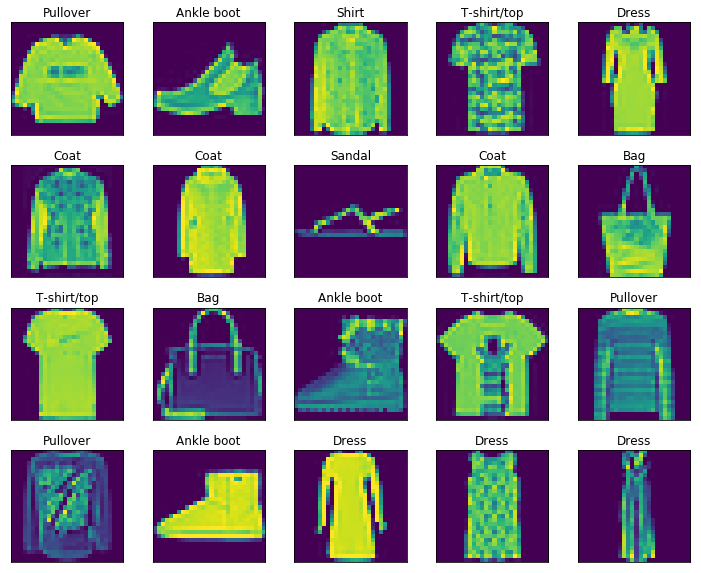

In [0]:
#Print the shape of data
print("x_train_total shape: ",x_train_orig.shape)
print("y_train_total shape: ",y_train_orig.shape)
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_valshape: ",x_val.shape)
print("y_val shape: ",y_val.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

#Mapping number to product
target_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

#Reshaping the data and plotting 20 images and their labels
x_train_orig=x_train_orig.reshape(60000,28,28)
y_train_orig=y_train_orig.reshape(60000)

plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train_orig[i] )
    plt.title(target_dict[(y_train_orig[i])])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [0]:
"""The cell finds the results for a 2 layer Neural Network"""

#Define the 2 layer Neural Network
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation='softmax')
])

#Compile the 2 layer Neural Network.
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Fit the model on training data
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=25,
                    verbose=0,
                    validation_data=(x_val, y_val))

#Calculate the score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss for 2 layer Neural Network: ', score[0])
print('Test accuracy for 2 layer Neural Network: ', score[1])

Test loss for 2 layer Neural Network:  0.2015971699118614
Test accuracy for 2 layer Neural Network:  0.9289833333333334


In [0]:
"""The cell finds the results for a Convolutional Neural Network with 3 convolution layers"""

#Reshape the input data
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)

#Print the shape of data
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_valshape: ",x_val.shape)
print("y_val shape: ",y_val.shape)

#CNN with 3 convolutional layers
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(512, activation='relu'),    
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

#Learning Rate Reduction and Early Stopping
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc', patience=3,verbose=1,factor=0.5,min_lr=0.00001)
ES=EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', baseline=None,restore_best_weights=False)

#Creating a file for samving the model
model_save_name = 'classifier.json'
path=F"/gdrive/My Drive/Colab Notebooks/{model_save_name}"
mcp_save=ModelCheckpoint(path,save_best_only=True, monitor='val_loss',mode='min')


cnn2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

cnn2.fit(x_train, y_train,
          batch_size=None,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks=[learning_rate_reduction, ES, mcp_save])

#Save the model with highest validation accuracy
cnn2.save("my_model.h5")

score = cnn2.evaluate(x_test, y_test, verbose=1)
print('Test loss using CNN with 3 convolutional layers: ', score[0])
print('Test accuracy using CNN with 3 convolutional layers: ', score[1])


x_train shape:  (42000, 28, 28, 1)
y_train shape:  (42000,)
x_valshape:  (18000, 28, 28, 1)
y_val shape:  (18000,)
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 23s 540us/step - loss: 0.5933 - acc: 0.7783 - val_loss: 0.3853 - val_acc: 0.8512
Epoch 2/10
42000/42000 [==============================] - 18s 433us/step - loss: 0.3865 - acc: 0.8595 - val_loss: 0.3078 - val_acc: 0.8859
Epoch 3/10
42000/42000 [==============================] - 18s 431us/step - loss: 0.3386 - acc: 0.8766 - val_loss: 0.3001 - val_acc: 0.8885
Epoch 4/10
42000/42000 [==============================] - 18s 430us/step - loss: 0.3134 - acc: 0.8850 - val_loss: 0.2767 - val_acc: 0.8979
Epoch 5/10
42000/42000 [==============================] - 18s 428us/step - loss: 0.2974 - acc: 0.8912 - val_loss: 0.2717 - val_acc: 0.8986
Epoch 6/10
42000/42000 [==============================] - 18s 427us/step - loss: 0.2773 - acc: 0.8969 - val_loss: 0.2819 - val_acc: 0.8954
E

In [0]:
"""The cell finds the results for a Convolutional Neural Network with 3 convolution layers and Data Augmentation"""

#Data Augmentation
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(x_train, y_train, batch_size=batch_size)
val_batches = gen.flow(x_val, y_val, batch_size=batch_size)

cnn2.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=10, 
                    validation_data=val_batches, validation_steps=12000//batch_size, verbose=1, use_multiprocessing=False)

#Calculate the score
score = cnn2.evaluate(x_test, y_test, verbose=1)
print('Test loss using CNN with 3 convolutional layers and Data Augmentation: ', score[0])
print('Test accuracy using CNN with 3 convolutional layers and Data Augmentation: ', score[1])

Epoch 1/10
93/93 [==============================] - 24s 262ms/step - loss: 0.4545 - acc: 0.8318 - val_loss: 0.3880 - val_acc: 0.8550
Epoch 2/10
93/93 [==============================] - 23s 243ms/step - loss: 0.4031 - acc: 0.8497 - val_loss: 0.3690 - val_acc: 0.8572
Epoch 3/10
93/93 [==============================] - 22s 241ms/step - loss: 0.3940 - acc: 0.8530 - val_loss: 0.3753 - val_acc: 0.8612
Epoch 4/10
93/93 [==============================] - 22s 240ms/step - loss: 0.3724 - acc: 0.8584 - val_loss: 0.3553 - val_acc: 0.8649
Epoch 5/10
93/93 [==============================] - 23s 243ms/step - loss: 0.3592 - acc: 0.8649 - val_loss: 0.3358 - val_acc: 0.8749
Epoch 6/10
93/93 [==============================] - 23s 246ms/step - loss: 0.3516 - acc: 0.8672 - val_loss: 0.3321 - val_acc: 0.8751
Epoch 7/10
93/93 [==============================] - 22s 240ms/step - loss: 0.3423 - acc: 0.8721 - val_loss: 0.3204 - val_acc: 0.8781
Epoch 8/10
93/93 [==============================] - 22s 241ms/step - 

In [0]:
"""The cell finds the results for a Convolutional Neural Network with 3 convolution layers and Batch Normalization"""

#Calculates the mean of x - train data
mean_px = x_train.mean().astype(np.float32)

#Calculates the standard deviation of x - train data
std_px = x_train.std().astype(np.float32)

def norm_input(x):
    """Finds the normalized value of input x"""
    return (x-mean_px)/std_px

#CNN with 3 convolutional layers and Batch Normalization 
cnn3 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.2),
        
    Conv2D(128, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

#Creating a file for samving the model
model_save_name = 'classifier_final.json'
path=F"/gdrive/My Drive/Colab Notebooks/{model_save_name}"
mcp_save=ModelCheckpoint(path,save_best_only=True, monitor='val_loss',mode='min')

cnn3.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

cnn3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks=[learning_rate_reduction, ES, mcp_save])

#Save the model with highest validation accuracy
cnn3.save("my_model.h5")

#Calculate the score
score = cnn3.evaluate(x_test, y_test, verbose=1)
print('Test loss using CNN with 3 convolutional layers and Batch Normalization: ', score[0])
print('Test accuracy using CNN with 3 convolutional layers and Batch Normalization: ', score[1])



Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 30s 709us/step - loss: 0.6399 - acc: 0.7875 - val_loss: 0.3798 - val_acc: 0.8641
Epoch 2/10
42000/42000 [==============================] - 23s 553us/step - loss: 0.3978 - acc: 0.8606 - val_loss: 0.3054 - val_acc: 0.8877
Epoch 3/10
42000/42000 [==============================] - 23s 552us/step - loss: 0.3174 - acc: 0.8868 - val_loss: 0.2823 - val_acc: 0.8984
Epoch 4/10
42000/42000 [==============================] - 23s 552us/step - loss: 0.2810 - acc: 0.9001 - val_loss: 0.2678 - val_acc: 0.9040
Epoch 5/10
42000/42000 [==============================] - 23s 552us/step - loss: 0.3176 - acc: 0.8861 - val_loss: 0.3061 - val_acc: 0.8918
Epoch 6/10
42000/42000 [==============================] - 23s 551us/step - loss: 0.2616 - acc: 0.9062 - val_loss: 0.2533 - val_acc: 0.9095
Epoch 7/10
42000/42000 [==============================] - 23s 551us/step - loss: 0.2438 - acc: 0.9133 - val_loss: 0.

In [0]:
"""The cell finds the results for a Convolutional Neural Network with 3 convolution layers, Batch Normalization and Data Augmentation"""

cnn3.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=10, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False, verbose=1)

#Calculate the score
score = cnn3.evaluate(x_test, y_test, verbose=1)
print('Test loss using CNN with 3 convolutional layers, Batch Normalization and Data Augmentation: ', score[0])
print('Test accuracy using CNN with 3 convolutional layers, Batch Normalization and Data Augmentation: ', score[1])

Epoch 1/10
93/93 [==============================] - 29s 313ms/step - loss: 0.4734 - acc: 0.8295 - val_loss: 0.4224 - val_acc: 0.8457
Epoch 2/10
93/93 [==============================] - 27s 289ms/step - loss: 0.3896 - acc: 0.8564 - val_loss: 0.3770 - val_acc: 0.8647
Epoch 3/10
93/93 [==============================] - 27s 286ms/step - loss: 0.3749 - acc: 0.8628 - val_loss: 0.3772 - val_acc: 0.8626
Epoch 4/10
93/93 [==============================] - 27s 293ms/step - loss: 0.3622 - acc: 0.8691 - val_loss: 0.3387 - val_acc: 0.8730
Epoch 5/10
93/93 [==============================] - 27s 287ms/step - loss: 0.3390 - acc: 0.8763 - val_loss: 0.3123 - val_acc: 0.8876
Epoch 6/10
93/93 [==============================] - 27s 294ms/step - loss: 0.3449 - acc: 0.8733 - val_loss: 0.3814 - val_acc: 0.8594
Epoch 7/10
93/93 [==============================] - 27s 291ms/step - loss: 0.3137 - acc: 0.8859 - val_loss: 0.3411 - val_acc: 0.8747
Epoch 8/10
93/93 [==============================] - 27s 289ms/step - 